In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import umap

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r"C:\Users\Ishi\Desktop\MCM Competition\TEEBDatabase.xlsx", sheet_name = 1)
data.isnull().sum()/len(data)
data.var()
data

,ValueID,Used for TEEB analysis?,Biome,Ecosystem,ESService,ESSubservice,Country,Country Income Group (World Bank 2007),Country Population Density (World Bank 2005),Protected Status,...,ValueType,Value,Unit,Currency,NotesOther,ServiceArea,Authors,Year Of Publication,Title,Full reference
0,4,False,Tropical Forest,Tropical rain forests,Water,Water [unspecified],Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,1.559000e+09,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
1,5,True,Tropical Forest,Tropical rain forests,Food,Fish,Indonesia,Lower Middle Income,Low density,Protected,...,Annual,1.320000e+01,USD/ha/yr,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
2,6,False,Tropical Forest,Tropical rain forests,Extreme events,Flood prevention,Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,1.407000e+09,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
3,7,True,Tropical Forest,Tropical rain forests,Erosion,Erosion prevention,Indonesia,Lower Middle Income,Low density,Protected,...,Annual,9.000000e+02,USD/ha/yr,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
4,8,False,Tropical Forest,Tropical rain forests,Recreation,Recreation,Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,2.890000e+08,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
5,9,False,Tropical Forest,Tropical rain forests,Genepool,Biodiversity protection,Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,2.740000e+08,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
6,10,False,Tropical Forest,Tropical rain forests,Climate,C-sequestration,Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,1.265000e+08,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
7,11,False,Tropical Forest,Tropical rain forests,Extreme events,Fire Prevention,Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,3.725000e+08,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
8,12,True,Tropical Forest,Tropical rain forests,Food,NTFPs [food only!],Indonesia,Lower Middle Income,Low density,Protected,...,Annual,2.274400e+01,USD/ha/yr,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."
9,13,False,Tropical Forest,Tropical rain forests,Raw materials,Timber,Indonesia,Lower Middle Income,Low density,Protected,...,Net Present Value,1.004500e+09,USD,US Dollar,NaN,2500000.0,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J...",2003,Economic valuation of the Leuser National Park...,"Van Beukering, P.J.H., H.S.J. Cesar and M.A. J..."


In [4]:
df = data[['Biome','Ecosystem','ESService','ESSubservice','Country','Value','Unit','Currency','ServiceArea']]

In [5]:
x1 = df.iloc[:, 0:5]
x2 = df.iloc[:, 7:9]
X = x1.join(x2)
X
y = df.loc[:,"Value"]
df

,Biome,Ecosystem,ESService,ESSubservice,Country,Value,Unit,Currency,ServiceArea
0,Tropical Forest,Tropical rain forests,Water,Water [unspecified],Indonesia,1.559000e+09,USD,US Dollar,2500000.0
1,Tropical Forest,Tropical rain forests,Food,Fish,Indonesia,1.320000e+01,USD/ha/yr,US Dollar,2500000.0
2,Tropical Forest,Tropical rain forests,Extreme events,Flood prevention,Indonesia,1.407000e+09,USD,US Dollar,2500000.0
3,Tropical Forest,Tropical rain forests,Erosion,Erosion prevention,Indonesia,9.000000e+02,USD/ha/yr,US Dollar,2500000.0
4,Tropical Forest,Tropical rain forests,Recreation,Recreation,Indonesia,2.890000e+08,USD,US Dollar,2500000.0
5,Tropical Forest,Tropical rain forests,Genepool,Biodiversity protection,Indonesia,2.740000e+08,USD,US Dollar,2500000.0
6,Tropical Forest,Tropical rain forests,Climate,C-sequestration,Indonesia,1.265000e+08,USD,US Dollar,2500000.0
7,Tropical Forest,Tropical rain forests,Extreme events,Fire Prevention,Indonesia,3.725000e+08,USD,US Dollar,2500000.0
8,Tropical Forest,Tropical rain forests,Food,NTFPs [food only!],Indonesia,2.274400e+01,USD/ha/yr,US Dollar,2500000.0
9,Tropical Forest,Tropical rain forests,Raw materials,Timber,Indonesia,1.004500e+09,USD,US Dollar,2500000.0


In [6]:
biomes = {}
for i in df.Biome:
    if i not in biomes:
        biomes[i] = 0
    biomes[i] += 1
    
services = {}
for i in df.ESService:
    if i not in services:
        services[i] = 0
    services[i] += 1
subservices = {}
for i in df.ESSubservice:
    if i not in subservices:
        subservices[i] = 0
    subservices[i] += 1
subservices

{'Water [unspecified]': 17,
 'Fish': 66,
 'Flood prevention': 21,
 'Erosion prevention': 26,
 'Recreation': 53,
 'Biodiversity protection': 66,
 'C-sequestration': 27,
 'Fire Prevention': 2,
 'NTFPs [food only!]': 18,
 'Timber': 30,
 'Fuel wood and charcoal': 16,
 'Fodder': 5,
 'Ecotourism': 6,
 'Microclimate regulation': 1,
 'Biochemicals': 6,
 'Natural irrigation': 1,
 'Plants / vegetable food': 12,
 'Other Raw': 13,
 'Decorations / Handicrafts': 1,
 'Meat': 4,
 'Nursery service': 23,
 'Water purification': 23,
 'Various': 7,
 'Food [unspecified]': 24,
 'Storm protection': 12,
 'Tourism': 52,
 'Hydro-electricity': 6,
 'Deposition of nutrients': 2,
 'Gas regulation': 5,
 'Climate regulation [unspecified]': 10,
 'Prevention of extreme events [unspecified]': 15,
 'Water regulation [unspecified]': 7,
 'Soil formation': 3,
 'Nutrient cycling': 8,
 'Waste treatment [unspecified]': 11,
 'Pollination [unspecified]': 4,
 'Biological Control [unspecified]': 9,
 'Raw materials [unspecified]': 2

In [7]:
small = df[df.ESSubservice == "Biodiversity protection"]
small[small.Biome == "Tropical Forest"]

,Biome,Ecosystem,ESService,ESSubservice,Country,Value,Unit,Currency,ServiceArea
5,Tropical Forest,Tropical rain forests,Genepool,Biodiversity protection,Indonesia,2.740000e+08,USD,US Dollar,2.500000e+06
16,Tropical Forest,Tropical rain forests,Genepool,Biodiversity protection,India,4.350000e+02,USD/ha/yr,US Dollar,3.698600e+07
21,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,Lao People's Democratic Republic,7.000000e-02,USD/ha/yr,US Dollar,1.241610e+05
194,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,Mexico,5.215000e+00,USD/ha/yr,US Dollar,5.800000e+06
207,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,Cambodia,5.110000e+02,USD/ha,US Dollar,1.813000e+03
294,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,World,7.000000e+00,USD/ha/yr,US Dollar,1.704300e+09
295,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,World,4.400000e+03,USD/ha/yr,US Dollar,1.704300e+09
341,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,Belize,6.400000e+00,USD/ha/yr,US Dollar,5.000000e+08
358,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,Brazil,4.800000e+01,USD/ha/yr,US Dollar,1.900000e+07
365,Tropical Forest,Tropical forest general,Genepool,Biodiversity protection,World,2.904000e+01,USD/ha/yr,US Dollar,4.451542e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

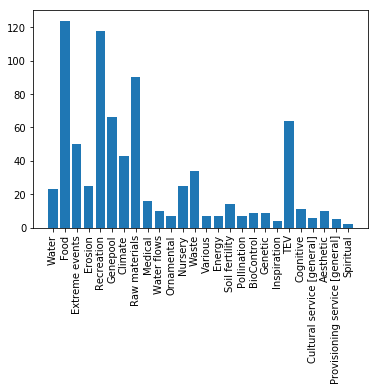

In [8]:
services.items()
sortedservices = sorted(services.items())
names = list(services.keys())
values = list(services.values())

plt.bar(range(len(services)),values,tick_label=names)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

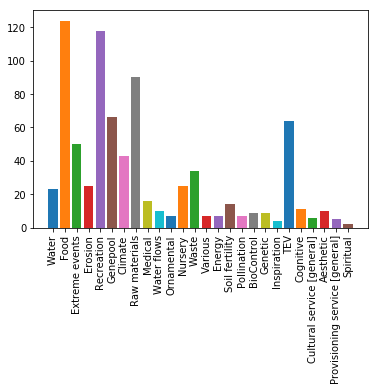

In [9]:
services.items()
sortedservices = sorted(services.items())
names = list(services.keys())
values = list(services.values())

for i in range(len(services)):
    plt.bar(i,values[i],tick_label=names[i])
plt.xticks(range(0,26),names)
plt.xticks(rotation=90)

In [10]:
# services.items()
sortedservices = 1#
#names = sortedservices[
values = list(services.values())
services.values()

for i in services:
    services[i] = services.values()/sum(services.values())
services.values()
sum(services.values())

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

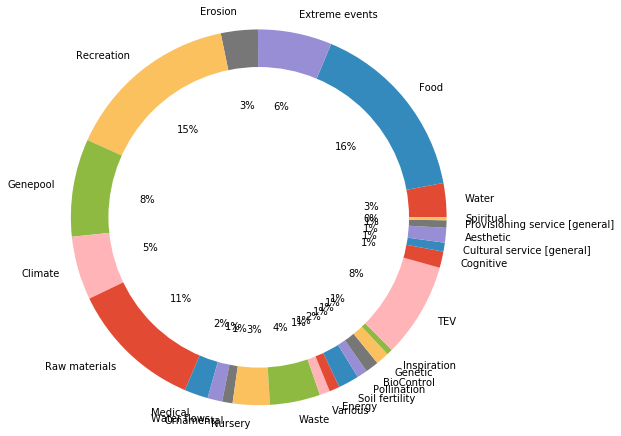

In [12]:
plt.style.use('ggplot')
services = {}
for i in df.ESService:
    if i not in services:
        services[i] = 0
    services[i] += 1

services.items()
services_names = []
services_sizes = []
for i in services.items():
    services_names.append(i[0])
    services_sizes.append(i[1])

plt.figure(figsize=(6,6))
plt.pie(services_sizes, labels=services_names, autopct = '%1.0f%%')

#draw circle
center_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()


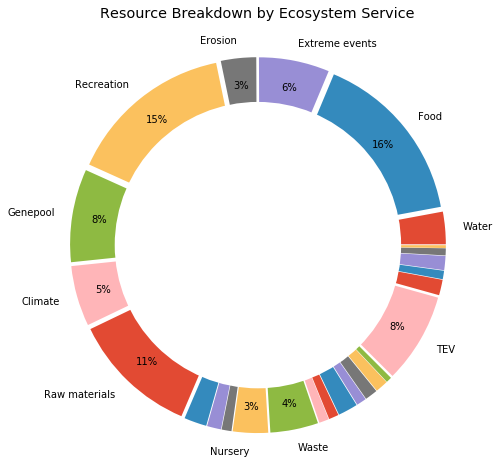

In [13]:
plt.figure(figsize=(6,6))

#explosion
explode = [0.05 for i in range(len(services))]

service_names2 = []
service_sizes2 = []

for i in services.items():
    service_sizes2.append(i[1])
    if i[1] < 20:
        service_names2.append("")
    else:
        service_names2.append(i[0])
    
#my_autopct(pct):
def my_autopct(pct):
    return('%1.0f%%' % pct) if pct > 3 else ''
#pie chart
plt.pie(service_sizes2, labels=service_names2, autopct = my_autopct, explode=explode,
       pctdistance = 0.85)
#draw circle
center_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.title("Resource Breakdown by Ecosystem Service").set_position([.5,1.05])
plt.savefig('EcosystemServiceResourceBreakdown.png')

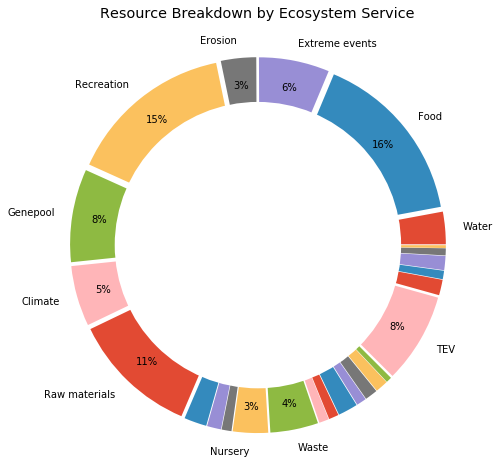

In [14]:
plt.style.use('ggplot')
services = {}
for i in df.ESService:
    if i not in services:
        services[i] = 0
    services[i] += 1

services.items()
services_names = []
services_sizes = []
for i in services.items():
    services_names.append(i[0])
    services_sizes.append(i[1])

plt.figure(figsize=(6,6))

#explosion
explode = [0.05 for i in range(len(services))]

service_names2 = []
service_sizes2 = []

for i in services.items():
    service_sizes2.append(i[1])
    if i[1] < 20:
        service_names2.append("")
    else:
        service_names2.append(i[0])
    
#my_autopct(pct):
def my_autopct(pct):
    return('%1.0f%%' % pct) if pct > 3 else ''
#pie chart
plt.pie(service_sizes2, labels=service_names2, autopct = my_autopct, explode=explode,
       pctdistance = 0.85)
#draw circle
center_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.title("Resource Breakdown by Ecosystem Service").set_position([.5,1.05])
plt.savefig('EcosystemServiceResourceBreakdown.png')

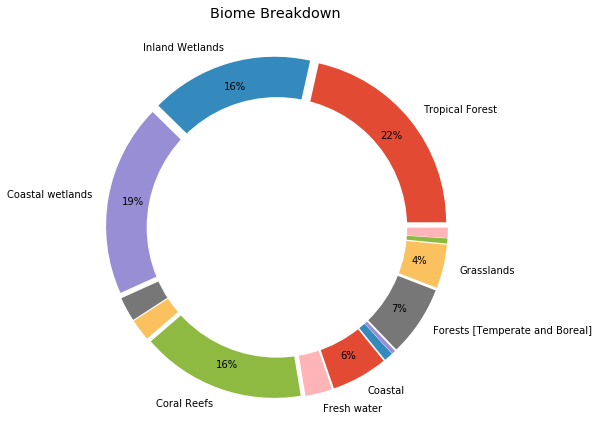

In [18]:
plt.style.use('ggplot')
biomes = {}
for i in df.Biome:
    if i not in biomes:
        biomes[i] = 0
    biomes[i] += 1

biomes.items()
biome_names = []
biome_sizes = []
for i in biomes.items():
    biome_names.append(i[0])
    biome_sizes.append(i[1])

plt.figure(figsize=(6,6))

#explosion
explode = [0.05 for i in range(len(biomes))]

biome_names2 = []
biome_sizes2 = []

for i in biomes.items():
    biome_sizes2.append(i[1])
    if i[1] < 20:
        biome_names2.append("")
    else:
        biome_names2.append(i[0])
    
#my_autopct(pct):
def my_autopct(pct):
    return('%1.0f%%' % pct) if pct > 3 else ''
#pie chart
plt.pie(biome_sizes2, labels=biome_names2, autopct = my_autopct, explode=explode,
       pctdistance = 0.85)
#draw circle
center_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.title("Biome Breakdown").set_position([.5,1.05])
plt.savefig('BiomeBreakdown.png')
plt.tight_layout()

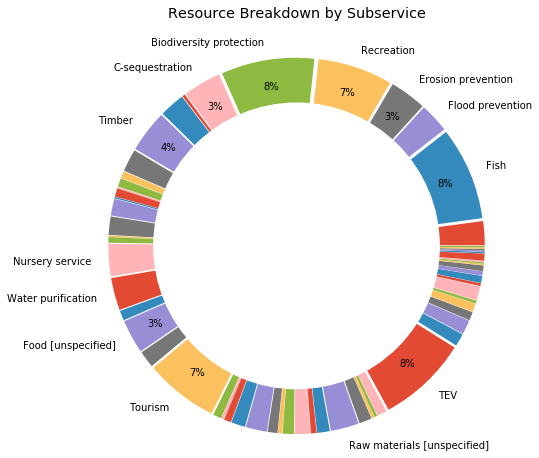

In [17]:
plt.style.use('ggplot')
subservices = {}
for i in df.ESSubservice:
    if i not in subservices:
        subservices[i] = 0
    subservices[i] += 1

subservices.items()
subservices_names = []
subservices_sizes = []
for i in subservices.items():
    subservices_names.append(i[0])
    subservices_sizes.append(i[1])

plt.figure(figsize=(6,6))

#explosion
explode = [0.05 for i in range(len(subservices))]

subservice_names2 = []
subservice_sizes2 = []

for i in subservices.items():
    subservice_sizes2.append(i[1])
    if i[1] < 20:
        subservice_names2.append("")
    else:
        subservice_names2.append(i[0])
    
#my_autopct(pct):
def my_autopct(pct):
    return('%1.0f%%' % pct) if pct > 3 else ''
#pie chart
plt.pie(subservice_sizes2, labels=subservice_names2, autopct = my_autopct, explode=explode,
       pctdistance = 0.85)
#draw circle
center_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()
plt.title("Resource Breakdown by Subservice").set_position([.5,1.05])
plt.savefig('SubserviceResourceBreakdown.png')

In [1]:
feature_dict = {
    0: 'Biome',
    1: 'Ecosystem',
    2: 'ESService',
    3: 'ESSubservice',
    4: 'Country',
    5: 'Unit',
    6: 'Currency',
    7: 'ServiceArea'
}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize = (8,6))
    for cnt in range(7):
        plt.subplot(2, 3, cnt+1)
        break
        df.columns[0]

biomes = []
for i in range(5):
    print(df.columns[i])
for i in df['Biome']:
    if i not in biomes:
        biomes.append(i)
print(biomes)
for i in biomes:
    pass

 
services = []
for i in df['ESService']:
    if i not in services:
        services.append(i)
services

df['Value']
c = pd.concat([df['Value'],df['ESService']], axis = 1)

watervalues = []
c.columns
for i in range(len(c['ESService'])):
    if c['ESService'][i] == "Water":
        watervalues.append(c['Value'][i])
        
energyvalues = []
for i in range(len(c['ESService'])):
    if c['ESService'][i] == "Food":
        energyvalues.append(c['Value'][i])
watervalues, energyvalues

NameError: name 'plt' is not defined

In [11]:
biomes

{'Tropical Forest': 169,
 'Inland Wetlands': 127,
 'Coastal wetlands': 150,
 'Cultivated': 19,
 'Multiple Ecosystems': 17,
 'Coral Reefs': 128,
 'Fresh water': 21,
 'Coastal': 44,
 'Woodlands': 7,
 'Desert': 3,
 'Forests [Temperate and Boreal]': 55,
 'Grasslands': 34,
 'Urban': 4,
 'Marine': 8}